In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import decomposition, manifold, metrics, neighbors
import math
import sklearn

In [ ]:
# Import data
train_in = np.loadtxt("train_in.csv", delimiter=",", dtype=np.float64)
test_in = np.loadtxt("test_in.csv", delimiter=",", dtype=np.float64)
train_out = np.loadtxt("train_out.csv", delimiter=",", dtype=np.int32)
test_out = np.loadtxt("test_out.csv", delimiter=",", dtype=np.int32)

In [ ]:
# Task 1

In [ ]:
# Example of one image
print(np.shape(train_in))
print(np.shape(train_out))
print(train_out[0])
print(np.shape(np.reshape(train_in[0],(16,16))))
plt.imshow(np.reshape(train_in[0],(16,16)))

In [ ]:
# Group input by outputs
# For every input point-cloud
#     Calculate mean for every dimension
def mean_cloud_vector_calc(digit_array):
  mean_vector = 0
  for ele in digit_array:
    for index in train_in[ele]:
      mean_vector += index
    mean_cloud_vector = mean_vector / len(digit_array[0])
    return mean_cloud_vector

# For train
## Given the outputfile digits, find index (row number) that corresponds to index on input file (vector)
train_all_0s = np.where(train_out == 0)
train_all_1s = np.where(train_out == 1)
train_all_2s = np.where(train_out == 2)
train_all_3s = np.where(train_out == 3)
train_all_4s = np.where(train_out == 4)
train_all_5s = np.where(train_out == 5)
train_all_6s = np.where(train_out == 6)
train_all_7s = np.where(train_out == 7)
train_all_8s = np.where(train_out == 8)
train_all_9s = np.where(train_out == 9)

#Calculate the mean vector cloud for a specific digit, to later use for classification
train_cloud_0 = mean_cloud_vector_calc(train_all_0s)
train_cloud_1 = mean_cloud_vector_calc(train_all_1s)
train_cloud_2 = mean_cloud_vector_calc(train_all_2s)
train_cloud_3 = mean_cloud_vector_calc(train_all_3s)
train_cloud_4 = mean_cloud_vector_calc(train_all_4s)
train_cloud_5 = mean_cloud_vector_calc(train_all_5s)
train_cloud_6 = mean_cloud_vector_calc(train_all_6s)
train_cloud_7 = mean_cloud_vector_calc(train_all_7s)
train_cloud_8 = mean_cloud_vector_calc(train_all_8s)
train_cloud_9 = mean_cloud_vector_calc(train_all_9s)

#Make easy accesable item for getting any mean_vector
train_all_mean_vectors_tuple = (train_cloud_0,
                                   train_cloud_1,
                                   train_cloud_2,
                                   train_cloud_3,
                                   train_cloud_4,
                                   train_cloud_5,
                                   train_cloud_6,
                                   train_cloud_7,
                                   train_cloud_8,
                                   train_cloud_9)
all_mean_vectors = np.vstack(train_all_mean_vectors_tuple)
print(all_mean_vectors)


In [ ]:
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

array_dist = []

# Distance calculation - of all digits against (itself and) all others
for digit in all_mean_vectors:
  array_digit = []
  for other_digit in all_mean_vectors:
    array_digit.append(np.sqrt(sum((digit - other_digit)**2)))
  array_dist.append(array_digit)

# Show distances between digits in a nice table
table = [["Digits", 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
for digit in digits:
  line = [digit]
  line.extend(array_dist[digit])
  table.append(line)
print(tabulate(table))

Lowest similarity score is 5.42 between digits 9 and 7, so that would be pair where we would expect most false positives / most difficulty separating. Other digits with small distances are: 3 - 5, 5 - 6, 4 - 9, and 8 - 9.

In [ ]:
# Task 1.2

# Set up various algorithms:

pca = sklearn.decomposition.PCA(n_components=2)
lle = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=80, n_components=2)
tsne = sklearn.manifold.TSNE(n_components=2, init="pca", random_state=0)

# Give colour identifier for each digit

plt.figure(figsize=(2,1))
colours = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple', 'pink', 'black', 'grey']
for digit in digits:
  plt.scatter(digit,0,c=colours[digit])
plt.show()

# Test PCA

pca_train = pca.fit_transform(train_in)

plt.figure(figsize=(5,5))
for digit in digits:
    plt.scatter(pca_train[train_out==digit][:,0], pca_train[train_out==digit][:,1], s=5, label=str(digit), c=colours[digit])
plt.legend(title="Digit" ,fancybox=True, fontsize='large')
plt.title("PCA")
plt.show()
plt.close()

# Test LLE

lle_train = lle.fit_transform(train_in)

plt.figure(figsize=(5,5))
for digit in digits:
    plt.scatter(lle_train[train_out==digit][:,0], lle_train[train_out==digit][:,1], s=5, label=str(digit), c=colours[digit])
plt.legend(title="Digit" ,fancybox=True, fontsize='large')
plt.title("LLE")
plt.show()
plt.close()

# Test TSNE

tsne_train = tsne.fit_transform(train_in)

plt.figure(figsize=(5,5))
for digit in digits:
    plt.scatter(tsne_train[train_out==digit][:,0], tsne_train[train_out==digit][:,1], s=5, label=str(digit), c=colours[digit])
plt.legend(title="Digit" ,fancybox=True, fontsize='large')
plt.title("t-SNE")
plt.show()
plt.close()

The expectation was that 7 and 9 would be hardest to differentiate, in additino to 3 - 5, 5 - 6, 4 - 9, and 8 - 9. From the first plot PCA, it seems the digits mentioned earlier are not the only digits with a strong overlap, but almost all digits have overlap (except for 1), although it seems possible to distuingish certain digits from others, i.e. 0-9 because of distance between them.
On the LLE plot however, it seems really only digit '1' differs enough from the other digits to be separated from the main cloud.
The third plot, t-SNE, shows a great promise in the sense that almost all digits are clustered together really well with some empty space inbetween different digits, but here too are a few outliers.

In [ ]:
# Task 1.3

def distance_classifier(input_data, mean_vector_data, output_data):
    row_count = sum(1 for row in input_data)
    correct_predictions = 0
    for row in range(0,row_count):
        #We want to reset shortest_distance to high value every new row/digit input
        shortest_distance = 100
        #Compare every input in the data to mean_vectors, calculate distance and find shortest
        for mean_vector_digit in mean_vector_data:
            distance = np.sqrt(sum((input_data[row] - mean_vector_digit)**2))
            #When distance turns out shorter than a previous one, replace and remember which mean_vector it was
            if distance < shortest_distance:
                shortest_distance = distance
                remember = mean_vector_digit
    ### Ok, now I just need a way to retrieve what digit it was using 'remember' variable
        predicted_digit = 0
        #Cant compare arrays so make string first
        remember_string = np.array2string(remember, precision=2, separator=',', suppress_small=True)
        for i in range(0,10):
        #Check for the 'remember' mean_vector string that calculated the shortest distance, what the index is in the all_vector array,
        # which is in numerical order, so is the predicted digit. - cycling through mean vectors and updating predicted digit value
            mean_vector_string = np.array2string(mean_vector_data[i], precision=2, separator=',', suppress_small=True)
            if remember_string == mean_vector_string:
                break
            else:
                predicted_digit += 1
        # Checking if predicted_digit corresponds to right digit in output data, and count corrects
        if test_out[row] == predicted_digit:
            correct_predictions += 1
    print(correct_predictions / row_count)

### Distance classifier for training data

def distance_classifier_train(input_data, mean_vector_data, output_data):
    row_count = sum(1 for row in input_data)
    correct_predictions = 0
    for row in range(0,row_count):
        #We want to reset shortest_distance to high value every new row/digit input
        shortest_distance = 100
        #Compare every input in the data to mean_vectors, calculate distance and find shortest
        for mean_vector_digit in mean_vector_data:
            distance = np.sqrt(sum((input_data[row] - mean_vector_digit)**2))
            #When distance turns out shorter than a previous one, replace and remember which mean_vector it was
            if distance < shortest_distance:
                shortest_distance = distance
                remember = mean_vector_digit
    ### Ok, now I just need a way to retrieve what digit it was using 'remember' variable
        predicted_digit = 0
        #Cant compare arrays so make string first
        remember_string = np.array2string(remember, precision=2, separator=',', suppress_small=True)
        for i in range(0,10):
        #Check for the 'remember' mean_vector string that calculated the shortest distance, what the index is in the all_vector array,
        # which is in numerical order, so is the predicted digit. - cycling through mean vectors and updating predicted digit value
            mean_vector_string = np.array2string(mean_vector_data[i], precision=2, separator=',', suppress_small=True)
            if remember_string == mean_vector_string:
                break
            else:
                predicted_digit += 1
        # Checking if predicted_digit corresponds to right digit in output data, and count corrects
        if train_out[row] == predicted_digit:
            correct_predictions += 1
    print(correct_predictions / row_count)

distance_classifier(test_in, all_mean_vectors, test_out)
distance_classifier_train(train_in, all_mean_vectors, train_out)
# Accuracy of 0.804

0.804
0.8635032220269478


In [ ]:
# Task 1.4

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier


#Handrule, amount of neighbors should be sqrt(data_points) -> math.sqrt(len(y_test)) gives 31
classifier = KNeighborsClassifier(n_neighbors = 31, p=2, metric='euclidean')
classifier.fit(train_in, train_out)

y_pred = classifier.predict(train_in)

cm = confusion_matrix(train_out, y_pred)

print(cm)

print(accuracy_score(train_out, y_pred))

Accuracy is 85.1%. This is already 5% percent better than the simplest distance based classifier.

predicted \ actual
The confusion-matrix shows most false positives (>8) for:
predicted 2 - actual 0,
predicted 6 - actual 0,
predicted 4 - actual 1,
predicted 5 - actual 3
predicted 4 - actual 9


In [ ]:
# Task 2
# Initialise the perceptron (by creating a matrix of weights of 10x256+1 (specified later))

def perceptron_init(input_dimensions, output_dimensions):
  init = np.random.rand(output_dimensions, input_dimensions+1)
  return init

# Make the perceptron learn/update (lecture 2; slide 10)

def perceptron_learn(perceptron, input_data, output_class):
  output = perceptron.dot(np.append(np.array([1]), input_data))
  output_value = output[output_class]
  for i in np.where(output > output_value)[0]:
    perceptron[i,:] -= np.append(np.array([1]), input_data) # Here we weaken all of the wrong weights
  perceptron[output_class, :] += np.append(np.array([1]), input_data) # Here we strenghten the weights for the correct output
  return perceptron

# Train the perceptron

def perceptron_train(perceptron, input_data, output_data, iterations):
  iter = 0
  matrix = np.ones(len(output_data))
  while iter < iterations: # We run over the given number of update steps
    matrix = np.zeros_like(matrix)
    for i in range(len(output_data)): 
      matrix[i] = int(np.argmax(perceptron.dot(np.append(np.array([1]), input_data[i]))) != output_data[i])
    for i in np.where(matrix == 1)[0]: # In case of a wrong case we run the learning/update function
      perceptron = perceptron_learn(perceptron, input_data[i], output_data[i])
    iter += 1
  return perceptron

# Accuracy function just to test the accuracy of the perceptron for a given dataset

def perceptron_accuracy(perceptron, input_data, output_data):
  check = np.zeros(len(output_data))
  for i in range(len(output_data)):
    check[i] = int(np.argmax(perceptron.dot(np.append(np.array([1]), input_data[i]))) == output_data[i])#
  return np.sum(check) / len(output_data)

In [ ]:
# Testing the perceptron for multiple iteration numbers

import time

iteration_numbers = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 250, 500]

train_acc_arr = []
test_acc_arr = []

train_acc = []
test_acc = []

for iteration_num in iteration_numbers:
  for i in range(10):
    model = perceptron_init(256,10)
    model_trained = perceptron_train(model, train_in, train_out, iteration_num)

    # Test it on training set:
    train_accuracy = perceptron_accuracy(model, train_in, train_out)
    train_acc.append(train_accuracy)

    # Test it on test set:
    test_accuracy = perceptron_accuracy(model, test_in, test_out)
    test_acc.append(test_accuracy)
  train_acc_arr.append(np.mean(train_acc))
  test_acc_arr.append(np.mean(test_acc))
  print("Iteration number done: " + str(iteration_num))

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(iteration_numbers, train_acc_arr, label="Training")
plt.plot(iteration_numbers, test_acc_arr, label="Test")
plt.legend(title="Test set" ,fancybox=True, fontsize='large')
plt.title("Accuracy vs total iteration number")
plt.xlabel("Total iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
for i in range(10):
  model = perceptron_init(256,10)
  model_trained = perceptron_train(model, train_in, train_out, 100)
    # Test it on training set:
    #t0 = time.time()
  print("Train set accuracy:")
  train_accuracy = perceptron_accuracy(model, train_in, train_out)
  print(train_accuracy)
    #t1 = time.time()
  train_acc.append(train_accuracy)
    #print("Time: " + str(t1-t0))

    # Test it on test set:
    #t0 = time.time()
  print("Test set accuracy:")
  test_accuracy = perceptron_accuracy(model, test_in, test_out)
  print(test_accuracy)
    #t1 = time.time()
  test_acc.append(test_accuracy)
    #print("Time: " + str(t1-t0))

In [ ]:
print(np.mean(train_acc))
print(np.mean(test_acc))

0.9520754874884927
0.8461571428571428


It seems that even 100 iterations of training suffice to almost reach an average accuracy on the training set of 100% and approximately 86% for the test set. Compared to the distance based methods we have an improvement of 6% to the most basic one, and 1% to the slightly more advanced sklearn method.

In [ ]:
train_acc = []
test_acc = []

for i in range(10):
  model = perceptron_init(256,10)
  model_trained = perceptron_train(model, train_in, train_out, 1000)
  # Test it on training set:
  t0 = time.time()
  print("Train set accuracy:")
  train_accuracy = perceptron_accuracy(model, train_in, train_out)
  print(train_accuracy)
  t1 = time.time()
  train_acc.append(train_accuracy)
  print("Time: " + str(t1-t0))

  # Test it on test set:
  t0 = time.time()
  print("Test set accuracy:")
  test_accuracy = perceptron_accuracy(model, test_in, test_out)
  print(test_accuracy)
  t1 = time.time()
  test_acc.append(test_accuracy)
  print("Time: " + str(t1-t0))

print(np.mean(train_acc))
print(np.mean(test_acc))

Train set accuracy:
1.0
Time: 0.024961471557617188
Test set accuracy:
0.862
Time: 0.01465916633605957
Train set accuracy:
1.0
Time: 0.024576663970947266
Test set accuracy:
0.863
Time: 0.014315605163574219
Train set accuracy:
1.0
Time: 0.027938365936279297
Test set accuracy:
0.864
Time: 0.016031503677368164
Train set accuracy:
1.0
Time: 0.025501012802124023
Test set accuracy:
0.862
Time: 0.014685869216918945
Train set accuracy:
1.0
Time: 0.02467489242553711
Test set accuracy:
0.864
Time: 0.017845630645751953
Train set accuracy:
1.0
Time: 0.025519609451293945
Test set accuracy:
0.864
Time: 0.015079975128173828
Train set accuracy:
1.0
Time: 0.02550673484802246
Test set accuracy:
0.863
Time: 0.015494108200073242
Train set accuracy:
1.0
Time: 0.025980472564697266
Test set accuracy:
0.862
Time: 0.017578601837158203
Train set accuracy:
1.0
Time: 0.025078535079956055
Test set accuracy:
0.862
Time: 0.015455484390258789
Train set accuracy:
1.0
Time: 0.02896285057067871
Test set accuracy:
0.863
T

With 1000 iterations, a train set accuracy of 100% is reached, however the test set accuracy barely changes.

In [ ]:
# Task 3
import numpy as np
input = np.array([(0,0),(1,0),(0,1),(1,1)])
output = np.array([0,1,1,0])
weights = np.random.rand(3,3)

# 3.1

# For activation functions we have the sigmoid as sig(x), tanh as np.tanh(x), and relu
def sig(x):
  return 1 / (1 + np.exp(-x))

def relu(x):
  return max(0, x)

def xor_net(x1, x2, weights):
  Y_hid_1 = sig(x1 * weights[0][0] + x2 * weights[0][1] + 1 * weights[0][2])
  Y_hid_2 = sig(x1 * weights[1][0] + x2 * weights[1][1] + 1 * weights[1][2])
  Y_output = sig(Y_hid_1 * weights[2][0] + Y_hid_2 * weights[2][1] + 1 * weights[2][2])
  return Y_output

xor_net(input[0][0],input[0][1],weights)

# 3.2

def mse(weights):
    MSE = 1/4 * ((xor_net(0,0,weights))**2 + (xor_net(0,1,weights)-1)**2 + (xor_net(1,0,weights)-1)**2 + (xor_net(1,1,weights))**2)
    return MSE

# 3.3

def grdmse(weights):
    stepsize = 0.01
    gradients = np.zeros_like(weights) # Initialise gradients
    for i in range(3):
      for j in range(3):
        # Check down
        weights[i][j] -= stepsize
        down = mse(weights)

        # Check up
        weights[i][j] += 2 * stepsize
        up = mse(weights)

        # Reset weights
        weights[i][j] -= stepsize

        # Set the gradient
        gradients[i][j] = (up - down) / (2*stepsize)
    return gradients


In [ ]:
#3.4
mses = []
correct_guesses_arr = []
correct_guesses = 0

stepsizes = [0.1]

for stepsize in stepsizes:
    weights = np.random.rand(3,3)
    epoch = 0
    while mse(weights) != 0:
        # Weight updating
        weights -= stepsize * grdmse(weights)

        if (xor_net(0, 0, weights) < 0.5) and (xor_net(0, 1, weights) > 0.5) and (xor_net(1, 0, weights) > 0.5) and (xor_net(1, 1, weights) < 0.5):
            # Here we have a correct guess
            correct_guesses += 1
            correct_guesses_arr.append(correct_guesses)

        epoch += 1
        mses.append(mse(weights))
        if epoch == 100000:
            break
        if epoch % 10000 == 0:
            print(mse(weights))
    print("Run with stepsize: " + str(stepsize) + " finished with " + str(epoch) + " epochs.")

    print(xor_net(0,0,weights))
    print(xor_net(1,0,weights))
    print(xor_net(0,1,weights))
    print(xor_net(1,1,weights))
mses_sig = mses

0


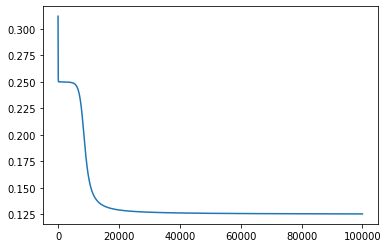

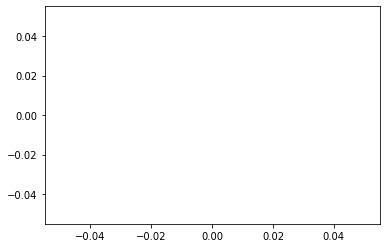

In [ ]:
plt.figure()
plt.title("MSE over time for sigmoid function")
plt.plot(mses_sig)

plt.figure()
plt.plot(correct_guesses_arr)

In [ ]:
# ALL FUNCTIONS FOR TANH:

def sig(x):
    return np.tanh(x)

def xor_net(x1, x2, weights):
    Y_hid_1 = sig(x1 * weights[0][0] + x2 * weights[0][1] + 1 * weights[0][2])
    Y_hid_2 = sig(x1 * weights[1][0] + x2 * weights[1][1] + 1 * weights[1][2])
    Y_output = sig(Y_hid_1 * weights[2][0] + Y_hid_2 * weights[2][1] + 1 * weights[2][2])
    return Y_output

def mse(weights):
    MSE = 1/4 * ((xor_net(0,0,weights))**2 + (xor_net(0,1,weights)-1)**2 + (xor_net(1,0,weights)-1)**2 + (xor_net(1,1,weights))**2)
    return MSE

#3.4
mses = []
correct_guesses_arr = []
correct_guesses = 0

stepsizes = [0.1]
# Initialize weights
weights = np.random.rand(3,3)
# Iterate: weights = weights - n * grdmse(weights)
for stepsize in stepsizes:
    epoch = 0
    while mse(weights) != 0:
        # Weight updating
        weights -= stepsize * grdmse(weights)
        
        if (xor_net(0, 0, weights) < 0.5) and (xor_net(0, 1, weights) > 0.5) and (xor_net(1, 0, weights) > 0.5) and (xor_net(1, 1, weights) < 0.5):
            # Here we have a correct guess
            correct_guesses += 1
            correct_guesses_arr.append(correct_guesses)

        epoch += 1
        mses.append(mse(weights))
        if epoch == 20000:
            break
        #if epoch % 2000 == 0:
            #print(mse(weights))

    print("Run with stepsize: " + str(stepsize) + " finished with " + str(epoch) + " epochs.")
print(xor_net(0,0,weights))
print(xor_net(1,0,weights))
print(xor_net(0,1,weights))
print(xor_net(1,1,weights))

mses_tanh = mses

Run with stepsize: 0.1 finished with 20000 epochs.
6.728651515512439e-05
0.9921615798939293
0.992163127541855
0.00010144139571942494


In [ ]:
# ALL FUNCTIONS FOR relu:

def sig(x):
  return relu(x)

def xor_net(x1, x2, weights):
  Y_hid_1 = sig(x1 * weights[0][0] + x2 * weights[0][1] + 1 * weights[0][2])
  Y_hid_2 = sig(x1 * weights[1][0] + x2 * weights[1][1] + 1 * weights[1][2])
  Y_output = sig(Y_hid_1 * weights[2][0] + Y_hid_2 * weights[2][1] + 1 * weights[2][2])
  return Y_output

def mse(weights):
    MSE = 1/4 * ((xor_net(0,0,weights))**2 + (xor_net(0,1,weights)-1)**2 + (xor_net(1,0,weights)-1)**2 + (xor_net(1,1,weights))**2)
    return MSE

#3.4
mses = []
correct_guesses_arr = []
correct_guesses = 0

stepsizes = [0.1]
# Initialize weights
weights = np.random.rand(3,3)
# Iterate: weights = weights - n * grdmse(weights)
for stepsize in stepsizes:
    epoch = 0
    while mse(weights) != 0:
        # Weight updating
        weights -= stepsize * grdmse(weights)

        if (xor_net(0, 0, weights) < 0.5) and (xor_net(0, 1, weights) > 0.5) and (xor_net(1, 0, weights) > 0.5) and (xor_net(1, 1, weights) < 0.5):
            # Here we have a correct guess
            correct_guesses += 1
            correct_guesses_arr.append(correct_guesses)

        epoch += 1
        mses.append(mse(weights))

        if epoch == 20000:
            break
        #if epoch % 2000 == 0:
            #print(mse(weights))

    print("Run with stepsize: " + str(stepsize) + " finished with " + str(epoch) + " epochs.")
print(xor_net(0,0,weights))
print(xor_net(1,0,weights))
print(xor_net(0,1,weights))
print(xor_net(1,1,weights))

mses_relu = mses

Run with stepsize: 0.1 finished with 20000 epochs.
0.5000000000000003
0.5000000000000008
0.4999999999999996
0.5000000000000001


0


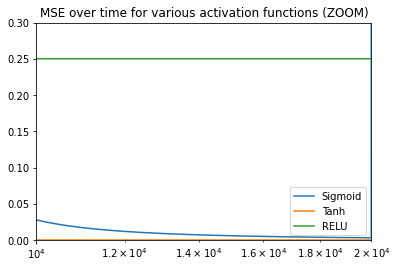

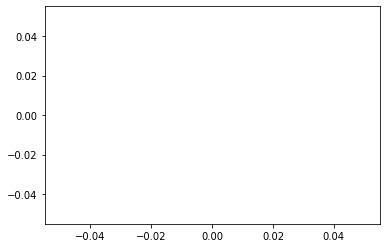

In [ ]:
plt.figure()
plt.title("MSE over time for various activation functions")
plt.plot(mses_sig, label="Sigmoid")
plt.plot(mses_tanh, label="Tanh")
plt.plot(mses_relu, label="RELU")
plt.legend()
plt.xscale("log")